# Problem 1: Language Modeling with RNNs


In [1]:
from lib.rnn import *
from lib.layer_utils import *
from lib.grad_check import *
from lib.optim import *
from lib.train import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Recurrent Neural Networks
We will use recurrent neural network (RNN) language models for text generation.

This contains implementations of different layer types that are needed for recurrent neural networks. And then, complete the uses these layers to implement a text generation model.

# Vanilla RNN: step forward
Open the file `lib/layer_utils.py`. Implement the forward and backward passes for different types of layers that are commonly used in recurrent neural networks.

First complete the implementation of the function `step_forward` which implements the forward pass for a single timestep of a vanilla recurrent neural network.

After doing so run the following code. You should see errors less than 1e-8.

In [2]:
%reload_ext autoreload

N, D, H = 3, 10, 4

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")
x = np.linspace(-0.4, 0.7, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.2, 0.5, num=N*H).reshape(N, H)

rnn.params[rnn.wx_name] = np.linspace(-0.1, 0.9, num=D*H).reshape(D, H)
rnn.params[rnn.wh_name] = np.linspace(-0.3, 0.7, num=H*H).reshape(H, H)
rnn.params[rnn.b_name] = np.linspace(-0.2, 0.4, num=H)

next_h, _ = rnn.step_forward(x, prev_h)
expected_next_h = np.asarray([
  [-0.58172089, -0.50182032, -0.41232771, -0.31410098],
  [ 0.66854692,  0.79562378,  0.87755553,  0.92795967],
  [ 0.97934501,  0.99144213,  0.99646691,  0.99854353]])

print('next_h error: ', rel_error(expected_next_h, next_h))

next_h error:  6.292421426471037e-09


# Vanilla RNN: step backward 
Refer `lib/layer_utils.py`

In [3]:
%reload_ext autoreload

np.random.seed(231)
N, D, H = 4, 5, 6

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.random.randn(N, D)
h = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

out, meta = rnn.step_forward(x, h)

dnext_h = np.random.randn(*out.shape)

dx_num = eval_numerical_gradient_array(lambda x: rnn.step_forward(x, h)[0], x, dnext_h)
dprev_h_num = eval_numerical_gradient_array(lambda h: rnn.step_forward(x, h)[0], h, dnext_h)
dWx_num = eval_numerical_gradient_array(lambda Wx: rnn.step_forward(x, h)[0], Wx, dnext_h)
dWh_num = eval_numerical_gradient_array(lambda Wh: rnn.step_forward(x, h)[0], Wh, dnext_h)
db_num = eval_numerical_gradient_array(lambda b: rnn.step_forward(x, h)[0], b, dnext_h)

dx, dprev_h, dWx, dWh, db = rnn.step_backward(dnext_h, meta)

print('dx error: ', rel_error(dx_num, dx))
print('dprev_h error: ', rel_error(dprev_h_num, dprev_h))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  5.473855898318782e-10
dprev_h error:  2.4550958628123683e-10
dWx error:  1.264200416692046e-10
dWh error:  3.1863456358952086e-10
db error:  1.655233896888798e-11


# Vanilla RNN: forward 
Now that you have  completed the forward and backward passes for a single timestep of a vanilla RNN, you will see how they are combined to implement a RNN that process an entire sequence of data.

In the `VanillaRNN` class in the file `lib/layer_utils.py`, refer to the `forward` and `backward` functions

After doing so run the following to check the implementation. You should see errors less than `1e-7`.

In [4]:
%reload_ext autoreload

N, T, D, H = 2, 3, 4, 5

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.linspace(-0.1, 0.3, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.3, 0.1, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.4, num=D*H).reshape(D, H)
Wh = np.linspace(-0.4, 0.1, num=H*H).reshape(H, H)
b = np.linspace(-0.7, 0.1, num=H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

h = rnn.forward(x, h0)
expected_h = np.asarray([
  [
    [-0.42070749, -0.27279261, -0.11074945,  0.05740409,  0.22236251],
    [-0.39525808, -0.22554661, -0.0409454,   0.14649412,  0.32397316],
    [-0.42305111, -0.24223728, -0.04287027,  0.15997045,  0.35014525],
  ],
  [
    [-0.55857474, -0.39065825, -0.19198182,  0.02378408,  0.23735671],
    [-0.27150199, -0.07088804,  0.13562939,  0.33099728,  0.50158768],
    [-0.51014825, -0.30524429, -0.06755202,  0.17806392,  0.40333043]]])
print('h error: ', rel_error(expected_h, h))

h error:  7.728466158305164e-08


# Vanilla RNN: backward
This runs back-propagation over the entire sequence, calling into the `step_backward` function defined above.

You should see errors less than 5e-7.

In [5]:
%reload_ext autoreload

np.random.seed(231)

N, D, T, H = 2, 3, 10, 5

rnn = VanillaRNN(D, H, init_scale=0.02, name="rnn_test")

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, H)
Wh = np.random.randn(H, H)
b = np.random.randn(H)

rnn.params[rnn.wx_name] = Wx
rnn.params[rnn.wh_name] = Wh
rnn.params[rnn.b_name] = b

out = rnn.forward(x, h0)

dout = np.random.randn(*out.shape)

dx, dh0 = rnn.backward(dout)

dx_num = eval_numerical_gradient_array(lambda x: rnn.forward(x, h0), x, dout)
dh0_num = eval_numerical_gradient_array(lambda h0: rnn.forward(x, h0), h0, dout)
dWx_num = eval_numerical_gradient_array(lambda Wx: rnn.forward(x, h0), Wx, dout)
dWh_num = eval_numerical_gradient_array(lambda Wh: rnn.forward(x, h0), Wh, dout)
db_num = eval_numerical_gradient_array(lambda b: rnn.forward(x, h0), b, dout)

dWx = rnn.grads[rnn.wx_name]
dWh = rnn.grads[rnn.wh_name]
db = rnn.grads[rnn.b_name]

print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  1.527236865833785e-08
dh0 error:  5.738374478844355e-10
dWx error:  4.83885492255263e-10
dWh error:  3.1607814663118426e-10
db error:  1.2508040521053878e-10


# Word embedding: forward
In deep learning systems, we commonly represent words using vectors. Each word of the vocabulary will be associated with a vector, and these vectors will be learned jointly with the rest of the system.



In [6]:
%reload_ext autoreload

N, T, V, D = 2, 4, 5, 3

we = word_embedding(V, D, name="we")

x = np.asarray([[0, 3, 1, 2], [2, 1, 0, 3]])
W = np.linspace(0, 1, num=V*D).reshape(V, D)

we.params[we.w_name] = W

out = we.forward(x)
expected_out = np.asarray([
 [[ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.42857143,  0.5,         0.57142857]],
 [[ 0.42857143,  0.5,         0.57142857],
  [ 0.21428571,  0.28571429,  0.35714286],
  [ 0.,          0.07142857,  0.14285714],
  [ 0.64285714,  0.71428571,  0.78571429]]])

print('out error: ', rel_error(expected_out, out))

out error:  1.0000000094736443e-08


# Word embedding: backward 
Implement the backward pass for the word embedding function in the function `backward` in the `word_embedding` class. After doing so run the following to numerically gradient check your implementation. You should see errors less than `1e-11`.

In [7]:
%reload_ext autoreload

np.random.seed(231)

N, T, V, D = 50, 3, 5, 6

we = word_embedding(V, D, name="we")

x = np.random.randint(V, size=(N, T))
W = np.random.randn(V, D)

we.params[we.w_name] = W

out = we.forward(x)
dout = np.random.randn(*out.shape)
we.backward(dout)

dW = we.grads[we.w_name]

f = lambda W: we.forward(x)
dW_num = eval_numerical_gradient_array(f, W, dout)

print('dW error: ', rel_error(dW, dW_num))

dW error:  3.2759440934795915e-12


# Temporal Fully Connected layer
At every timestep we use an affine function to transform the RNN hidden vector at that timestep into scores for each word in the vocabulary.

In [8]:
%reload_ext autoreload

np.random.seed(231)

# Gradient check for temporal affine layer
N, T, D, M = 2, 3, 4, 5

t_fc = temporal_fc(D, M, init_scale=0.02, name='test_t_fc')

x = np.random.randn(N, T, D)
w = np.random.randn(D, M)
b = np.random.randn(M)

t_fc.params[t_fc.w_name] = w
t_fc.params[t_fc.b_name] = b

out = t_fc.forward(x)

dout = np.random.randn(*out.shape)

dx_num = eval_numerical_gradient_array(lambda x: t_fc.forward(x), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: t_fc.forward(x), w, dout)
db_num = eval_numerical_gradient_array(lambda b: t_fc.forward(x), b, dout)

dx = t_fc.backward(dout)
dw = t_fc.grads[t_fc.w_name]
db = t_fc.grads[t_fc.b_name]

print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

dx error:  3.2269470390098687e-10
dw error:  3.8595619942595054e-11
db error:  1.1455396263586309e-11


# Temporal Softmax Cross-Entropy loss
When rolling out a RNN language model to generate a sentence, at every timestep we produce a score for each word in the vocabulary, propotional to the predicted likelihood of this word appearing at the particular timestep in the sentence. We know the ground-truth word at each timestep, so we use a softmax cross-entropy loss function to (1) compute a proper probability distribution over the words in the vocabulary at every time step and (2) use this to compute loss and gradient at each timestep. We sum the losses over time and average them over the minibatch.

Run the following cell to sanity check the loss and perform numeric gradient checking on the function. You should see an error for dx less than 1e-7.

In [9]:
%reload_ext autoreload

loss_func = temporal_softmax_CE_loss()

# Sanity check for temporal softmax loss
N, T, V = 100, 1, 10

def check_loss(N, T, V, p):
    x = 0.001 * np.random.randn(N, T, V)
    y = np.random.randint(V, size=(N, T))
    mask = np.random.rand(N, T) <= p
    print(loss_func.forward(x, y, mask))
  
check_loss(100, 1, 10, 1.0)   # Should be about 2.3
check_loss(100, 10, 10, 1.0)  # Should be about 23
check_loss(5000, 10, 10, 0.1) # Should be about 2.3

# Gradient check for temporal softmax loss
N, T, V = 7, 8, 9

x = np.random.randn(N, T, V)
y = np.random.randint(V, size=(N, T))
mask = (np.random.rand(N, T) > 0.5)

loss = loss_func.forward(x, y, mask)
dx = loss_func.backward()

dx_num = eval_numerical_gradient(lambda x: loss_func.forward(x, y, mask), x, verbose=False)

print('dx error: ', rel_error(dx, dx_num))

2.3026547279318357
23.026307039328714
2.2989009292538665
dx error:  4.0464746298031226e-08


# RNN for language modeling
For now only check the forward and backward pass of the `TestRNN` model and ignore the `TODOs` in the constructor; you will implement these later. After doing so, run the following to check the forward and backward pass using a small test case; you should see error less than `1e-10`.

In [1]:
%reload_ext autoreload

N, D, H = 10, 20, 40
V = 4
T = 13

model = TestRNN(D, H, cell_type='rnn')
loss_func = temporal_softmax_CE_loss()

# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
model.assign_params()

features = np.linspace(-1.5, 0.3, num=(N * D * T)).reshape(N, T, D)
h0 = np.linspace(-1.5, 0.5, num=(N*H)).reshape(N, H)
labels = (np.arange(N * T) % V).reshape(N, T)

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((N, T))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

expected_loss = 51.0949189134

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

NameError: name 'TestRNN' is not defined

Run the following cell to perform more detailed gradient checking on the backward pass of the `TestRNN` class; you should errors around `1e-7` or less.

In [11]:
%reload_ext autoreload

np.random.seed(231)

batch_size = 2
timesteps = 3
input_dim = 4
hidden_dim = 6
label_size = 4

labels = np.random.randint(label_size, size=(batch_size, timesteps))
features = np.random.randn(batch_size, timesteps, input_dim)
h0 = np.random.randn(batch_size, hidden_dim)

model = TestRNN(input_dim, hidden_dim, cell_type='rnn')
loss_func = temporal_softmax_CE_loss()

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((batch_size, timesteps))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

dout, dh0 = model.backward(dLoss)

grads = model.grads

for param_name in sorted(grads):
    f = lambda _: loss_func.forward(model.forward(features, h0), labels, mask)
    param_grad_num = eval_numerical_gradient(f, model.params[param_name], verbose=False, h=1e-6)
    e = rel_error(param_grad_num, grads[param_name])
    print('%s relative error: %e' % (param_name, e))

vanilla_rnn_b relative error: 9.451394e-08
vanilla_rnn_wh relative error: 3.221744e-08
vanilla_rnn_wx relative error: 9.508480e-08


# LSTM
Vanilla RNNs can be tough to train on long sequences due to vanishing and exploding gradiants. LSTMs solve this problem by replacing the simple update rule in the forward step of the vanilla RNN with a gating mechanism as follows.

Similar to the vanilla RNN, at each timestep we receive an input $x_t\in\mathbb{R}^D$ and the previous hidden state $h_{t-1}\in\mathbb{R}^H$. Crucially, the LSTM also maintains an $H$-dimensional *cell state*, so we also receive the previous cell state $c_{t-1}\in\mathbb{R}^H$. The learnable parameters of the LSTM are an *input-to-hidden* matrix $W_x\in\mathbb{R}^{4H\times D}$, a *hidden-to-hidden* matrix $W_h\in\mathbb{R}^{4H\times H}$ and a *bias vector* $b\in\mathbb{R}^{4H}$.

At each timestep we first compute an *activation vector* $a\in\mathbb{R}^{4H}$ as $a=W_xx_t + W_hh_{t-1}+b$. We then divide this into four vectors $a_i,a_f,a_o,a_g\in\mathbb{R}^H$ where $a_i$ consists of the first $H$ elements of $a$, $a_f$ is the next $H$ elements of $a$, etc. We then compute the *input gate* $g\in\mathbb{R}^H$, *forget gate* $f\in\mathbb{R}^H$, *output gate* $o\in\mathbb{R}^H$ and *gate gate* $g\in\mathbb{R}^H$ as

$$
\begin{align*}
i = \sigma(a_i) \hspace{2pc}
f = \sigma(a_f) \hspace{2pc}
o = \sigma(a_o) \hspace{2pc}
g = \tanh(a_g)
\end{align*}
$$

where $\sigma$ is the sigmoid function and $\tanh$ is the hyperbolic tangent, both applied elementwise.

Finally we compute the next cell state $c_t$ and next hidden state $h_t$ as

$$
c_{t} = f\odot c_{t-1} + i\odot g \hspace{4pc}
h_t = o\odot\tanh(c_t)
$$

where $\odot$ is the elementwise product of vectors.

In the rest of the notebook we will implement the LSTM update rule and apply it to the text generation task. 

In the code, we assume that data is stored in batches so that $X_t \in \mathbb{R}^{N\times D}$, and will work with *transposed* versions of the parameters: $W_x \in \mathbb{R}^{D \times 4H}$, $W_h \in \mathbb{R}^{H\times 4H}$ so that activations $A \in \mathbb{R}^{N\times 4H}$ can be computed efficiently as $A = X_t W_x + H_{t-1} W_h$

# LSTM: step forward
Implement the forward pass for a single timestep of an LSTM in the `step_forward` function in the file `lib/layer_utils.py`. This should be similar to the `step_forward` function that you implemented above, but using the LSTM update rule instead.

Once you are done, run the following to perform a simple test of your implementation. You should see errors around `1e-8` or less.

In [12]:
%reload_ext autoreload

N, D, H = 3, 4, 5

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.linspace(-0.4, 1.2, num=N*D).reshape(N, D)
prev_h = np.linspace(-0.3, 0.7, num=N*H).reshape(N, H)
prev_c = np.linspace(-0.4, 0.9, num=N*H).reshape(N, H)
Wx = np.linspace(-2.1, 1.3, num=4*D*H).reshape(D, 4 * H)
Wh = np.linspace(-0.7, 2.2, num=4*H*H).reshape(H, 4 * H)
b = np.linspace(0.3, 0.7, num=4*H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

next_h, next_c, cache = lstm.step_forward(x, prev_h, prev_c)

expected_next_h = np.asarray([
    [ 0.24635157,  0.28610883,  0.32240467,  0.35525807,  0.38474904],
    [ 0.49223563,  0.55611431,  0.61507696,  0.66844003,  0.7159181 ],
    [ 0.56735664,  0.66310127,  0.74419266,  0.80889665,  0.858299  ]])
expected_next_c = np.asarray([
    [ 0.32986176,  0.39145139,  0.451556,    0.51014116,  0.56717407],
    [ 0.66382255,  0.76674007,  0.87195994,  0.97902709,  1.08751345],
    [ 0.74192008,  0.90592151,  1.07717006,  1.25120233,  1.42395676]])

print('next_h error: ', rel_error(expected_next_h, next_h))
print('next_c error: ', rel_error(expected_next_c, next_c))

next_h error:  5.7054131967097955e-09
next_c error:  5.8143123088804145e-09


# LSTM: step backward  
Implement the backward pass for a single LSTM timestep in the function `step_backward` in the file `lib/layer_utils.py`. Once you are done, run the following to perform numeric gradient checking on your implementation. You should see errors around `1e-6` or less.

In [13]:
%reload_ext autoreload

np.random.seed(231)

N, D, H = 4, 5, 6

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.random.randn(N, D)
prev_h = np.random.randn(N, H)
prev_c = np.random.randn(N, H)
Wx = np.random.randn(D, 4 * H)
Wh = np.random.randn(H, 4 * H)
b = np.random.randn(4 * H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

next_h, next_c, cache = lstm.step_forward(x, prev_h, prev_c)

dnext_h = np.random.randn(*next_h.shape)
dnext_c = np.random.randn(*next_c.shape)

fx_h = lambda x: lstm.step_forward(x, prev_h, prev_c)[0]
fh_h = lambda h: lstm.step_forward(x, prev_h, prev_c)[0]
fc_h = lambda c: lstm.step_forward(x, prev_h, prev_c)[0]
fWx_h = lambda Wx: lstm.step_forward(x, prev_h, prev_c)[0]
fWh_h = lambda Wh: lstm.step_forward(x, prev_h, prev_c)[0]
fb_h = lambda b: lstm.step_forward(x, prev_h, prev_c)[0]

fx_c = lambda x: lstm.step_forward(x, prev_h, prev_c)[1]
fh_c = lambda h: lstm.step_forward(x, prev_h, prev_c)[1]
fc_c = lambda c: lstm.step_forward(x, prev_h, prev_c)[1]
fWx_c = lambda Wx: lstm.step_forward(x, prev_h, prev_c)[1]
fWh_c = lambda Wh: lstm.step_forward(x, prev_h, prev_c)[1]
fb_c = lambda b: lstm.step_forward(x, prev_h, prev_c)[1]

num_grad = eval_numerical_gradient_array

dx_num = num_grad(fx_h, x, dnext_h) + num_grad(fx_c, x, dnext_c)
dh_num = num_grad(fh_h, prev_h, dnext_h) + num_grad(fh_c, prev_h, dnext_c)
dc_num = num_grad(fc_h, prev_c, dnext_h) + num_grad(fc_c, prev_c, dnext_c)
dWx_num = num_grad(fWx_h, Wx, dnext_h) + num_grad(fWx_c, Wx, dnext_c)
dWh_num = num_grad(fWh_h, Wh, dnext_h) + num_grad(fWh_c, Wh, dnext_c)
db_num = num_grad(fb_h, b, dnext_h) + num_grad(fb_c, b, dnext_c)

dx, dh, dc, dWx, dWh, db = lstm.step_backward(dnext_h, dnext_c, cache)

print('dx error: ', rel_error(dx_num, dx))
print('dh error: ', rel_error(dh_num, dh))
print('dc error: ', rel_error(dc_num, dc))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  2.1077529609580335e-10
dh error:  1.2487212711196288e-08
dc error:  2.2753589849551476e-09
dWx error:  1.6537270645338068e-07
dWh error:  2.787261668871591e-07
db error:  5.756527137503347e-08


# LSTM: forward 
In the class `lstm` in the file `lib/layer_utils.py`, implement the `forward` function to run an LSTM forward on an entire timeseries of data.

When you are done, run the following to check your implementation. You should see an error around `1e-7`.

In [14]:
%reload_ext autoreload

N, D, H, T = 2, 5, 4, 3

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.linspace(-0.4, 0.6, num=N*T*D).reshape(N, T, D)
h0 = np.linspace(-0.4, 0.8, num=N*H).reshape(N, H)
Wx = np.linspace(-0.2, 0.9, num=4*D*H).reshape(D, 4 * H)
Wh = np.linspace(-0.3, 0.6, num=4*H*H).reshape(H, 4 * H)
b = np.linspace(0.2, 0.7, num=4*H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

h = lstm.forward(x, h0)

expected_h = np.asarray([
 [[ 0.01764008,  0.01823233,  0.01882671,  0.0194232 ],
  [ 0.11287491,  0.12146228,  0.13018446,  0.13902939],
  [ 0.31358768,  0.33338627,  0.35304453,  0.37250975]],
 [[ 0.45767879,  0.4761092,   0.4936887,   0.51041945],
  [ 0.6704845,   0.69350089,  0.71486014,  0.7346449 ],
  [ 0.81733511,  0.83677871,  0.85403753,  0.86935314]]])

print('h error: ', rel_error(expected_h, h))

h error:  8.610537452106624e-08


# LSTM: backward 
Implement the backward pass for an LSTM over an entire timeseries of data in the function `backward` in the `lstm` class in the file `lib/layer_utils.py`. When you are done, run the following to perform numeric gradient checking on your implementation. You should see errors around `1e-7` or less.

In [15]:
%reload_ext autoreload

np.random.seed(231)

N, D, T, H = 2, 3, 10, 6

lstm = LSTM(D, H, init_scale=0.02, name='test_lstm')

x = np.random.randn(N, T, D)
h0 = np.random.randn(N, H)
Wx = np.random.randn(D, 4 * H)
Wh = np.random.randn(H, 4 * H)
b = np.random.randn(4 * H)

lstm.params[lstm.wx_name] = Wx
lstm.params[lstm.wh_name] = Wh
lstm.params[lstm.b_name] = b

out = lstm.forward(x, h0)

dout = np.random.randn(*out.shape)

dx, dh0 = lstm.backward(dout)
dWx = lstm.grads[lstm.wx_name] 
dWh = lstm.grads[lstm.wh_name]
db = lstm.grads[lstm.b_name]

dx_num = eval_numerical_gradient_array(lambda x: lstm.forward(x, h0), x, dout)
dh0_num = eval_numerical_gradient_array(lambda h0: lstm.forward(x, h0), h0, dout)
dWx_num = eval_numerical_gradient_array(lambda Wx: lstm.forward(x, h0), Wx, dout)
dWh_num = eval_numerical_gradient_array(lambda Wh: lstm.forward(x, h0), Wh, dout)
db_num = eval_numerical_gradient_array(lambda b: lstm.forward(x, h0), b, dout)

print('dx error: ', rel_error(dx_num, dx))
print('dh0 error: ', rel_error(dh0_num, dh0))
print('dWx error: ', rel_error(dWx_num, dWx))
print('dWh error: ', rel_error(dWh_num, dWh))
print('db error: ', rel_error(db_num, db))

dx error:  1.2777297454450096e-09
dh0 error:  5.400246436377873e-09
dWx error:  1.0361335066570142e-07
dWh error:  4.8992419977619405e-08
db error:  1.4044368298987433e-09


# LSTM model 

Now that you have implemented an LSTM, update the initialization of the `TestRNN` class in the file `lib/rnn.py` to handle the case where `self.cell_type` is `lstm`. 

Once you have done so, run the following to check your implementation. You should see a difference of less than `1e-10`.

In [16]:
%reload_ext autoreload

N, D, H = 10, 20, 40
V = 4
T = 13

model = TestRNN(D, H, cell_type='lstm')
loss_func = temporal_softmax_CE_loss()

# Set all model parameters to fixed values
for k, v in model.params.items():
    model.params[k] = np.linspace(-1.4, 1.3, num=v.size).reshape(*v.shape)
model.assign_params()

features = np.linspace(-1.5, 0.3, num=(N * D * T)).reshape(N, T, D)
h0 = np.linspace(-1.5, 0.5, num=(N*H)).reshape(N, H)
labels = (np.arange(N * T) % V).reshape(N, T)

pred = model.forward(features, h0)

# You'll need this
mask = np.ones((N, T))

loss = loss_func.forward(pred, labels, mask)
dLoss = loss_func.backward()

expected_loss = 49.2140256354

print('loss: ', loss)
print('expected loss: ', expected_loss)
print('difference: ', abs(loss - expected_loss))

loss:  49.21402563544293
expected loss:  49.2140256354
difference:  4.293099209462525e-11


# Let's have some fun!! 

The network is trained to predict what word is coming next given a previous word. Once you train the model, by looping the network, you can keep generating new text which is mimicing the original text source.

We will use one of the most frequently downloaded e-books, Alice's Adventures in Wonderland, from Project Gutenberg, where the original link can be found [here](https://www.gutenberg.org/ebooks/11).

For simplify training we extracted only the first chapter.

In [17]:
%reload_ext autoreload

input_file = open("data/alice.txt", "r")
input_text = input_file.readlines()
input_text = ''.join(input_text)

Simply run the following code to construct the training dataset.

In [18]:
%reload_ext autoreload

import re

text = re.split(' |\n',input_text.lower())  # all words are converted into lower case
outputSize = len(text)
word_list = list(set(text))
dataSize = len(word_list)
output = np.zeros(outputSize)
for i in range(0, outputSize):
    index = np.where(np.asarray(word_list) == text[i])
    output[i] = index[0]
data = output.astype(np.int)
gt_labels = data[1:]
input_data = data[:-1]

print('Input text size: %s' % outputSize)
print('Input word number: %s' % dataSize)

Input text size: 2170
Input word number: 778



* In the constructor, design a recurrent neutral network consisting of a word_embedding layer, recurrent unit, and temporal fully connected layer so that they match the provided dimensions.
* Please read the train.py under lib directory carefully and complete the TODO blocks in the train_net function.
Then execute the following code block to train the model. 

In [19]:
%reload_ext autoreload

# you can change the following parameters.
D = 16  # input dimension
H = 24  # hidden space dimension
T = 50  # timesteps
N = 8  # batch size
max_epoch = 100  # max epoch size

loss_func = temporal_softmax_CE_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = {'data_train': input_data, 'labels_train': gt_labels}

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)


(Iteration 1 / 27100) loss: 332.84959105254785
best performance 3.5961272475795294%
(Epoch 1 / 100) Training Accuracy: 0.035961272475795295
(Iteration 501 / 27100) loss: 284.9871671155338
best performance 4.149377593360995%
(Epoch 2 / 100) Training Accuracy: 0.04149377593360996
best performance 4.610419548178885%
(Epoch 3 / 100) Training Accuracy: 0.046104195481788846
(Iteration 1001 / 27100) loss: 267.966004614451
best performance 5.394190871369295%
(Epoch 4 / 100) Training Accuracy: 0.05394190871369295
best performance 7.053941908713693%
(Epoch 5 / 100) Training Accuracy: 0.07053941908713693
(Iteration 1501 / 27100) loss: 251.63351192136093
best performance 8.990318118948824%
(Epoch 6 / 100) Training Accuracy: 0.08990318118948824
best performance 10.189027201475334%
(Epoch 7 / 100) Training Accuracy: 0.10189027201475334
(Iteration 2001 / 27100) loss: 242.0134014575417
best performance 11.89488243430152%
(Epoch 8 / 100) Training Accuracy: 0.11894882434301521
best performance 13.324112

(Iteration 19001 / 27100) loss: 21.01260894224314
(Epoch 71 / 100) Training Accuracy: 0.9432918395573997
(Iteration 19501 / 27100) loss: 20.08508826948439
best performance 94.88243430152143%
(Epoch 72 / 100) Training Accuracy: 0.9488243430152143
(Epoch 73 / 100) Training Accuracy: 0.9483633010603965
(Iteration 20001 / 27100) loss: 18.377372941090997
best performance 95.29737206085753%
(Epoch 74 / 100) Training Accuracy: 0.9529737206085753
best performance 95.52789303826648%
(Epoch 75 / 100) Training Accuracy: 0.9552789303826649
(Iteration 20501 / 27100) loss: 15.816502877670338
best performance 95.57399723374827%
(Epoch 76 / 100) Training Accuracy: 0.9557399723374828
best performance 95.75841401567543%
(Epoch 77 / 100) Training Accuracy: 0.9575841401567543
(Iteration 21001 / 27100) loss: 17.110309538731066
best performance 96.03503918856616%
(Epoch 78 / 100) Training Accuracy: 0.9603503918856616
best performance 96.17335177501153%
(Epoch 79 / 100) Training Accuracy: 0.9617335177501153


Simply run the following code block to check the loss and accuracy curve. (We expect training accuracy to be >80%, you can change all parameters above except `T` to try to improve your training performance. The higher your performance, the better your text samples below will get.)

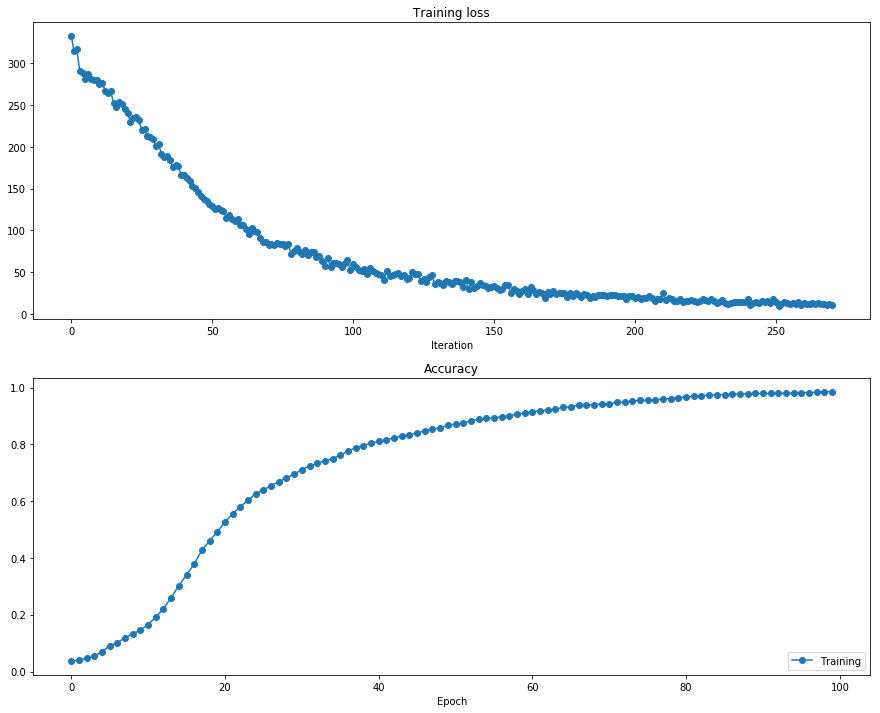

In [20]:
%reload_ext autoreload

opt_params, loss_hist, train_acc_hist = results

# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100]  # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)

plt.show()

Now you can generate text using the trained model. You can start from a specific word in the original text, such as `she`. (We expect the text to not be too repetitive, i.e. not repeating the same three words over and over. See an example of an acceptable sample below.)

> she was dozing off, and book-shelves; here and she tried to curtsey as she spoke--fancy curtseying as you’re falling through the little door into a dreamy sort of way, ‘do cats eat bats? do cats eat bats?’ and sometimes,

In [21]:
%reload_ext autoreload

# you can change the generated text length below.
text_length = 103

idx = 0
# you also can start from specific word. 
# since the words are all converted into lower case
idx = int(np.where(np.asarray(word_list) == 'She'.lower())[0])

# sample from the trained model
words = model.sample(idx, text_length-1)

# convert indices into words
output = [word_list[i] for i in words]
print(' '.join(output))

she had plenty of time as she fell past it.  ‘well!’ thought alice to herself, ‘after such a fall as this, i shall think nothing of tumbling down stairs! how brave they’ll all think me at home! why, i wouldn’t say anything about it, even if i fell off the top of the house!’ (which was very likely true.)  down, down, down. would the fall never come to an end! ‘i wonder how many miles i’ve fallen by this time?’ she said aloud. ‘i must be getting somewhere near the centre of the earth. let me see: that would be four


### Inline Question (2 Pts): Play around with different settings to get better understanding of its behavior and describe your observation. Make sure to cover at least the following points:

* Vanilla RNN vs LSTM (you can set different training timesteps `T` and `test_length` to test with longer texts.)
* Limitations you observed when training the recurrent language models. What could be causing them? (there's no unique answer. just explain your own opinion from experiments.)
### Ans:

LSTM performs better. The more the number of epochs and T, the more the training accuracy for LSTM. When I change the cell type to 'rnn': I observed repetitions in the phrases/sequences of words, on reducing timestep, which did not happen for LSTMs. 
- **Limitations of Vanilla RNN against LSTM:**
    - LSTM solves the vanishing gradient problem of Vanilla RNNs (happens because of repeated multiplication of largest value that is less than 1). LSTM makes use of forget gate and can remember / model longer dependencies better than Vanilla RNN.
- **Limitations of LSTM:**
    - LSTM cannot handle infinite sequences of words. It needs to be limited. Which we are doing by defining a finite number of time steps. 

# More Text Corpora 
If you want to explore the capabilities of your model further, feel free to train the model on new text corpora! Just bring them in the appropriate format (see above) and then train your model. You can change any of the hyperparameters in the code blocks below. If your model produces some fun outputs you can print them below (including the text corpus the model was trained on). We'll give a shout out in class to the ones we like the most.



In [22]:
%reload_ext autoreload

################ LOAD YOUR DATA HERE ####################
# word_list: list of unique vocabulary entries, e.g. ['', 'country', 'slippery;', 'hurt,', 'long', ...]
# data: integer array of shape (num_data_samples,), 
# holds index into word_list for each word in the input text, e.g. [649 377 263 ... 179 148 0]
word_list, data = ["Hello", "World"], [0,1]
#########################################################

gt_labels = data[1:]
input_data = data[:-1]

In [24]:
%reload_ext autoreload

# you can change the following parameters.
D = 10  # input dimention
H = 20  # hidden space dimention
T = 50  # timesteps
N = 10  # batch size
max_epoch = 50  # max epoch size

loss_func = temporal_softmax_CE_loss()
# you can change the cell_type between 'rnn' and 'lstm'.
model = LanguageModelRNN(dataSize, D, H, cell_type='lstm')
optimizer = Adam(model, 5e-4)

data = {'data_train': input_data, 'labels_train': gt_labels}

results = train_net(data, model, loss_func, optimizer, timesteps=T, batch_size=N, max_epochs=max_epoch, verbose=True)

opt_params, loss_hist, train_acc_hist = results

In [ ]:
%reload_ext autoreload

# Plot the learning curves
plt.subplot(2, 1, 1)
plt.title('Training loss')
loss_hist_ = loss_hist[1::100]  # sparse the curve a bit
plt.plot(loss_hist_, '-o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(train_acc_hist, '-o', label='Training')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)

plt.show()

In [ ]:
%reload_ext autoreload

# you can change the generated text length below.
text_length = 15

idx = 0
# you also can start from specific word. 
# since the words are all converted into lower case
idx = int(np.where(np.asarray(word_list) == 'She'.lower())[0])

# sample from the trained model
words = model.sample(idx, text_length-1)

# convert indices into words
output = [word_list[i] for i in words]
print(' '.join(output))

### Fun text generations?
[...]